In [34]:
import torch
import librosa
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, Wav2Vec2Config
import seaborn as sns

In [35]:
SEGMENTS_DIR = 'segments'
#WORDS = ['0-nan', '1-nam', '2-nin', '3-nim', '5-man', '6-mam', '7-min', '8-mim']
#WORDS = ['0-nan', '1-nam']
WORDS = ['6-mam', '8-mim']

In [36]:
LANG_ID = "en"
MODEL_ID = "facebook/wav2vec2-base-960h"
#MODEL_ID = "jonatasgrosman/wav2vec2-xls-r-1b-dutch"
SAMPLES = 10
SAMPLE_RATE = 16_000

In [37]:
configuration = Wav2Vec2Config(hidden_act='relu')

In [38]:
processor = Wav2Vec2Processor.from_pretrained(MODEL_ID)
model = Wav2Vec2ForCTC.from_pretrained(MODEL_ID)

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
#model.config.hidden_act = 'selu'
model.config.hidden_act

'gelu'

In [40]:
# Preprocessing the datasets.
# We need to read the audio files as arrays
def speech_file_to_array_fn(file_name):
    file = f'{SEGMENTS_DIR}/{file_name}.wav'
    speech_array, sampling_rate = librosa.load(file, sr=SAMPLE_RATE)
    return speech_array

dataset = [speech_file_to_array_fn(word) for word in WORDS]

In [41]:
inputs = processor(dataset, sampling_rate=SAMPLE_RATE, return_tensors="pt", padding="longest")

In [42]:
with torch.no_grad():
    model_output = model(inputs.input_values, output_hidden_states=True)
    logits = model_output.logits

predicted_ids = torch.argmax(logits, dim=-1)
predicted_sentences = processor.batch_decode(predicted_ids)

In [43]:
logits

tensor([[[ 10.8212, -22.9335, -22.6785,  ...,  -6.0389,  -5.8772,  -7.0412],
         [ 10.7876, -22.3097, -22.0948,  ...,  -5.6721,  -6.0926,  -6.0027],
         [ 10.8281, -22.5992, -22.4140,  ...,  -5.4493,  -6.4519,  -6.0362],
         ...,
         [  9.8969, -21.0155, -20.7547,  ...,  -4.8412,  -5.2581,  -5.6918],
         [  9.8718, -20.9584, -20.6982,  ...,  -4.8007,  -5.2350,  -5.6333],
         [  9.8706, -20.9583, -20.6981,  ...,  -4.8010,  -5.2348,  -5.6340]],

        [[ 12.8399, -25.0194, -24.6724,  ...,  -4.7942,  -5.7050,  -6.2245],
         [ 12.9019, -24.8537, -24.5029,  ...,  -4.9367,  -5.8561,  -5.8690],
         [ 12.7219, -24.5549, -24.2079,  ...,  -5.0664,  -5.8206,  -5.4868],
         ...,
         [ 12.0825, -23.0422, -22.7292,  ...,  -3.7806,  -4.8652,  -5.5119],
         [ 12.0990, -23.0343, -22.7220,  ...,  -3.7757,  -4.8610,  -5.5177],
         [ 12.2747, -24.2666, -23.9405,  ...,  -4.6835,  -5.2649,  -6.1115]]])

In [44]:
predicted_sentences

['MUM', 'MIM']

In [45]:
model_output.hidden_states.__len__()

13

In [46]:
model_output.hidden_states[0].shape

torch.Size([2, 34, 768])

In [65]:
layer_sequence = model_output.hidden_states[12]
layer_sequence[0].shape

torch.Size([34, 768])

In [66]:
similarities = torch.cosine_similarity(layer_sequence[0], layer_sequence[1], dim=1)
similarities

tensor([0.9252, 0.9135, 0.8997, 0.8183, 0.4924, 0.7777, 0.3719, 0.7147, 0.5869,
        0.6967, 0.6257, 0.2132, 0.4461, 0.6804, 0.5742, 0.7645, 0.6542, 0.2484,
        0.7221, 0.3563, 0.4486, 0.8048, 0.8986, 0.9424, 0.9328, 0.9433, 0.9344,
        0.9374, 0.9341, 0.9218, 0.9346, 0.9345, 0.9342, 0.9142])

<Axes: >

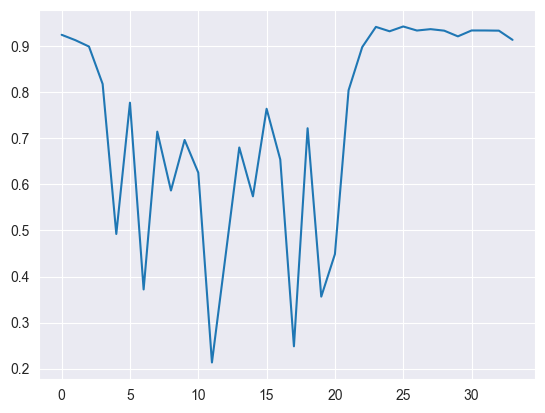

In [67]:
sns.lineplot(x=range(similarities.shape[0]), y=similarities)

In [68]:
def calculate_all_similarities(sequence_a, sequence_b):
    similarities_2darray = torch.zeros((sequence_a.shape[0], sequence_b.shape[0]))
    for i in range(sequence_a.shape[0]):
        for j in range(sequence_b.shape[0]):
            similarities_2darray[i][j] = torch.cosine_similarity(sequence_a[i], sequence_b[j], dim=0)
    return similarities_2darray

similarities = calculate_all_similarities(layer_sequence[0], layer_sequence[1])
similarities

tensor([[0.9252, 0.9359, 0.9422,  ..., 0.8990, 0.8989, 0.9214],
        [0.8952, 0.9135, 0.9296,  ..., 0.8806, 0.8807, 0.8946],
        [0.8542, 0.8768, 0.8997,  ..., 0.8468, 0.8470, 0.8546],
        ...,
        [0.9079, 0.9165, 0.9224,  ..., 0.9345, 0.9348, 0.9166],
        [0.9054, 0.9141, 0.9202,  ..., 0.9339, 0.9342, 0.9141],
        [0.9055, 0.9141, 0.9203,  ..., 0.9339, 0.9342, 0.9142]])

<Axes: >

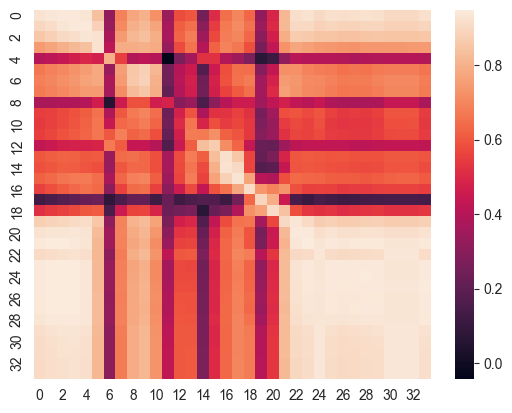

In [69]:

sns.heatmap(similarities)

In [52]:
similarities.shape


torch.Size([34, 34])

In [53]:
similarities[0][1]


tensor(0.6617)

In [54]:
def viterbi_algorithm(similarity_matrix):

SyntaxError: incomplete input (4131718595.py, line 1)

In [ ]:
def viterbi(probabilities):
    # Initialize the viterbi matrix
    viterbi = torch.zeros(probabilities.shape)
    # Initialize the backpointer matrix
    backpointer = torch.zeros(probabilities.shape, dtype=torch.long)
    # Initialize the first column of the viterbi matrix
    viterbi[0] = probabilities[0]
    # Initialize the first column of the backpointer matrix
    backpointer[0] = torch.zeros(probabilities.shape[1], dtype=torch.long)
    # Iterate over the columns of the viterbi matrix
    for t in range(1, probabilities.shape[0]):
        # Iterate over the rows of the viterbi matrix
        for s in range(probabilities.shape[1]):
            # Calculate the viterbi score for the current state
            viterbi[t][s] = probabilities[t][s] + torch.max(viterbi[t-1])
            # Calculate the backpointer for the current state
            backpointer[t][s] = torch.argmax(viterbi[t-1])
    # Initialize the best path with a tensor of zeros
    best_path = torch.zeros(probabilities.shape[0], dtype=torch.long)
    # Initialize the best path probability
    best_path_prob = torch.max(viterbi[-1])
    # Set the initial state of the best path
    best_path[-1] = torch.argmax(viterbi[-1])
    # Iterate over the backpointer matrix
    for t in range(backpointer.shape[0]-2, -1, -1):
        # Set the current state of the best path
        best_path[t] = backpointer[t+1][best_path[t+1]]
    return best_path, best_path_prob

In [ ]:
viterbi((similarities[:24][:24]).T)